## [範例重點]
了解機器學習建模的步驟、資料型態以及評估結果等流程

## # 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor

In [11]:
from sklearn import datasets, metrics

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

## 建立模型四步驟

在 Scikit-learn 中，建立一個機器學習的模型其實非常簡單，流程大略是以下四個步驟

1. 讀進資料，並檢查資料的 shape (有多少 samples (rows), 多少 features (columns)，label 的型態是什麼？)
    - 讀取資料的方法：
        - **使用 pandas 讀取 .csv 檔：**pd.read_csv
        - **使用 numpy 讀取 .txt 檔：**np.loadtxt 
        - **使用 Scikit-learn 內建的資料集：**sklearn.datasets.load_xxx
    - **檢查資料數量：**data.shape (data should be np.array or dataframe)
2. 將資料切為訓練 (train) / 測試 (test)
    - train_test_split(data)
3. 建立模型，將資料 fit 進模型開始訓練
    - clf = DecisionTreeClassifier()
    - clf.fit(x_train, y_train)
4. 將測試資料 (features) 放進訓練好的模型中，得到 prediction，與測試資料的 label (y_test) 做評估
    - clf.predict(x_test)
    - accuracy_score(y_test, y_pred)
    - f1_score(y_test, y_pred)

In [31]:
"""讀取鳶尾花資料集"""
iris = datasets.load_iris()

"""切分訓練集/測試集"""
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)

"""建立模型"""
clf = DecisionTreeClassifier()

"""訓練模型"""
clf.fit(x_train, y_train)

"""預測測試集"""
y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)
print(iris.feature_names)
print("Feature importance: ", clf.feature_importances_)

Acuuracy:  0.9736842105263158
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Feature importance:  [0.         0.01796599 0.05992368 0.92211033]


In [32]:
iris = datasets.load_iris()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(iris.feature_names)


(112, 4)
(38, 4)
(112,)
(38,)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


## Draw Decision Tree

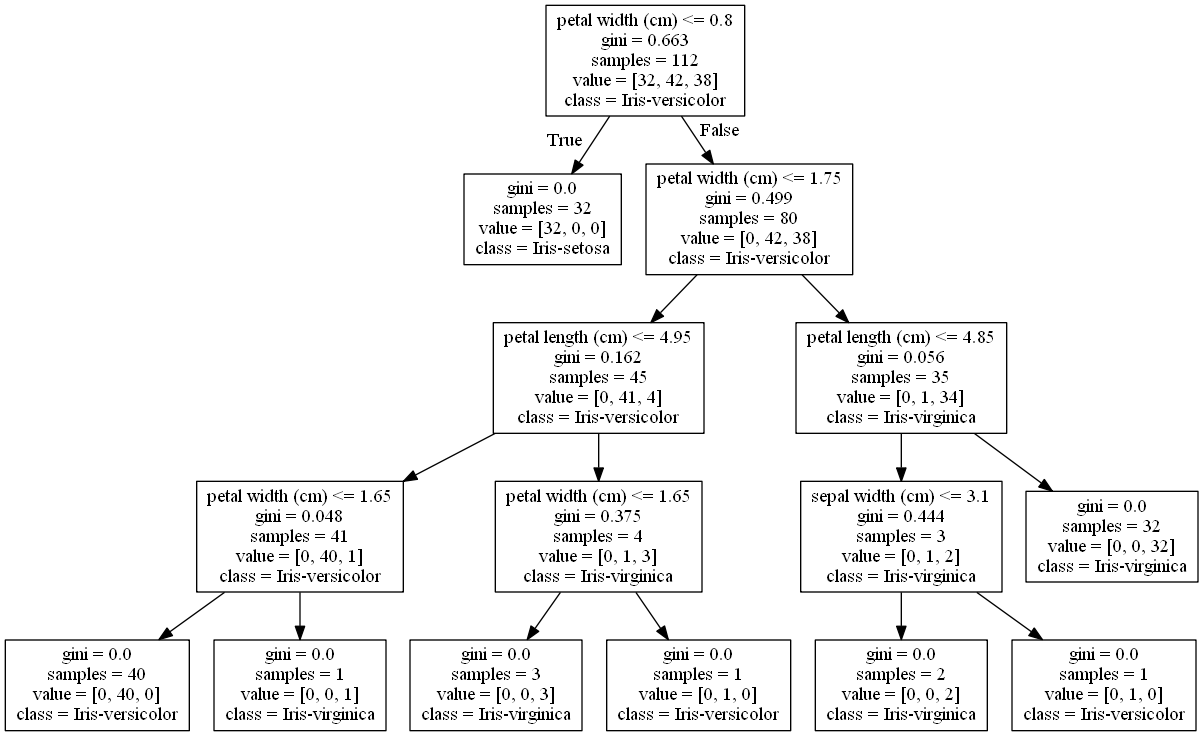

In [34]:
from sklearn.tree import export_graphviz
export_graphviz(clf, out_file="small_tree.dot", feature_names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'],
                class_names=['Iris-setosa','Iris-versicolor','Iris-virginica'],)

import pydot
(graph,) = pydot.graph_from_dot_file('small_tree.dot')

graph.write_png('small_tree.png')

from IPython.core.display import Image, display
display(Image('small_tree.png', unconfined=True))


In [35]:
"""讀取鳶尾花資料集"""
iris = datasets.load_iris()

"""切分訓練集/測試集"""
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)

"""建立模型"""
clf = DecisionTreeClassifier(criterion='entropy')

"""訓練模型"""
clf.fit(x_train, y_train)

"""預測測試集"""
y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)
print(iris.feature_names)
print("Feature importance: ", clf.feature_importances_)

Acuuracy:  0.9736842105263158
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Feature importance:  [0.         0.0156062  0.62264163 0.36175217]


## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [16]:
wine = datasets.load_wine()

x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size = 0.25, random_state = 4)

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)
print('\n')
print(wine.feature_names)
print('\n')
print("Feature importance: ", clf.feature_importances_)

Acuuracy:  0.9111111111111111


['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


Feature importance:  [0.01364138 0.03076567 0.         0.         0.         0.08158611
 0.         0.         0.         0.38107601 0.0184594  0.08582143
 0.38865   ]


In [17]:

x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size = 0.25, random_state = 4)

clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)
print('\n')
print(wine.feature_names)
print('\n')
print("Feature importance: ", clf.feature_importances_)

Acuuracy:  0.9777777777777777


['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


Feature importance:  [0.01794699 0.         0.         0.         0.01571782 0.
 0.41359716 0.         0.         0.2188998  0.         0.
 0.33383822]
